In [64]:
%load_ext autoreload
%autoreload 2

In [193]:
from qiskit import IBMQ, QuantumCircuit, QuantumRegister
from qiskit.circuit import ClassicalRegister
from qiskit.compiler import transpile, assemble

import time

In [4]:
IBMQ.save_account('ec26428d5f6b1d34b6c5962ddf997ae6b291734cfbb0ddd738101fc421fef62bf215159b2a4125a88eb89c215e7d1d981aa99c1e138b6239a2664e89f663bee4')

In [5]:
IBMQ.load_account() # Load account from disk
print(IBMQ.providers())    # List all available providers
provider = IBMQ.get_provider(hub='ibm-q-ornl')

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>]


In [59]:
#provider.backends()

In [32]:
backend= provider.get_backend('ibmq_qasm_simulator')
backend2= provider.get_backend('ibmq_montreal')

config= backend.configuration()
config2= backend2.configuration()

props= backend.properties()
props2= backend2.properties()

In [33]:
print('Backend 1: \n')
print('Qubits: ' + str(config.n_qubits))
print('Basis gates: ' + str(config.basis_gates))
print('Simulator? ' + str(config.simulator))

Backend 1: 

Qubits: 32
Basis gates: ['u1', 'u2', 'u3', 'u', 'p', 'r', 'rx', 'ry', 'rz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 'sx', 't', 'tdg', 'swap', 'cx', 'cy', 'cz', 'csx', 'cp', 'cu1', 'cu2', 'cu3', 'rxx', 'ryy', 'rzz', 'rzx', 'ccx', 'cswap', 'mcx', 'mcy', 'mcz', 'mcsx', 'mcp', 'mcu1', 'mcu2', 'mcu3', 'mcrx', 'mcry', 'mcrz', 'mcr', 'mcswap', 'unitary', 'diagonal', 'multiplexer', 'initialize', 'kraus', 'roerror', 'delay']
Simulator? True


In [34]:
print('Backend 2: \n')
print('Qubits: ' + str(config2.n_qubits))
print('Basis gates: ' + str(config2.basis_gates))
print('Simulator? ' + str(config2.simulator))

Backend 2: 

Qubits: 27
Basis gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
Simulator? False


In [54]:
qc= QuantumCircuit(4)
qc.add_register(ClassicalRegister(4))
qc.x(0)
qc.cx(0, 1)
qc.measure_all()

mapped_circuit = transpile(qc, backend=backend)
mapped_circuit.draw()

qobj = assemble(mapped_circuit, backend=backend, shots=1024)
job = backend.run(qobj)

In [57]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [58]:
result = job.result()
print(result)
counts = result.get_counts()
print(counts)

Result(backend_name='ibmq_qasm_simulator', backend_version='0.9.1', qobj_id='6a1eaab1-7e9f-4b73-8963-a39f0074dd9c', job_id='61df37c8fde78b6e2edbbcd4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x30': 1024}), header=QobjExperimentHeader(clbit_labels=[['c1', 0], ['c1', 1], ['c1', 2], ['c1', 3], ['meas', 0], ['meas', 1], ['meas', 2], ['meas', 3]], creg_sizes=[['c1', 4], ['meas', 4]], global_phase=0.0, memory_slots=8, metadata={}, n_qubits=4, name='circuit-151', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, metadata={'active_input_qubits': [0, 1, 2, 3], 'device': 'CPU', 'fusion': {'enabled': False}, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'measure_sampling': True, 'method': 'stabilizer', 'noise': 'ideal', 'num_clbits': 8, 'num_qubits': 4, 'parallel_shots': 1, 'parallel_state_update': 16, 'remapped_qubits': False}, seed_simulator=510259842, time_taken=0.0043925

In [60]:
#mapped_circuit2 = transpile(qc, backend=backend2)
#mapped_circuit2.draw()

In [40]:
if (False):
    
    from qiskit.providers.ibmq.managed import IBMQJobManager
    job_manager = IBMQJobManager()
    job_set = job_manager.run(circs, backend=backend, name='myjob', shots=8192)
    print(job_set.job_set_id())
    #79edb6a75d8c451e8b9809d598c69896-1611207980795541
    
    

if (False):
    #print(job_set.status())
    results = job_set.results()
    
    
if (False):
    job_manager = IBMQJobManager()
    provider = IBMQ.get_provider(hub='ibm-q-ornl')
    retrieved_foo = job_manager.retrieve_job_set(job_set_id='79edb6a75d8c451e8b9809d598c69896-1611207980795541',provider=provider)
    
    results = retrieved_foo.results()
    
    for i in range(73):
        np.save("results/79edb6a75d8c451e8b9809d598c69896-1611207980795541_"+str(i)+".npy",results.get_counts(i))

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

# Import and setup the hard-coded 2-step parton shower

In [175]:
#import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg_version2 as qps

import plotting as pl

In [176]:
N= 2
ni= 1
qps_obj= qps.QuantumPartonShower(N, ni)
print(qps_obj)

N= 2 
 ni= 1 
 L= 2 
 Total qubits: 12


In [177]:
eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1

shots= 10000

g_12= 1
qc, qubits= qps_obj.createCircuit(eps, g_1, g_2, g_12, initialParticles)
qps_obj.measure_Clbits()

qc.num_qubits

Applying step 1.
Apply uE()...
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.


12

In [178]:
qc.count_ops()

OrderedDict([('x', 20),
             ('measure', 14),
             ('cu3', 8),
             ('reset', 3),
             ('cry', 3),
             ('cx', 2),
             ('ry', 1),
             ('h', 1),
             ('u3', 1)])

## Run the circuit on qasm_simulator

In [179]:
backend= provider.get_backend('ibmq_qasm_simulator')
config= backend.configuration()
props= backend.properties()

mapped_circuit = transpile(qc, backend=backend)
mapped_circuit.draw()
qobj = assemble(mapped_circuit, backend=backend, shots=shots)

job = backend.run(qobj)

In [181]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [182]:
result = job.result()
counts = result.get_counts()
print(counts)
qc.draw()

{'000 001 000 001 100': 142, '000 001 000 001 101': 7, '000 000 000 000 100': 1393, '100 101 100 110 100': 771, '100 101 100 110 101': 108, '100 101 100 111 100': 186, '100 101 100 111 101': 37, '100 101 101 110 100': 177, '100 101 101 110 101': 39, '100 101 101 111 100': 211, '100 101 101 111 101': 36, '100 101 110 100 100': 788, '100 101 110 100 101': 126, '100 101 110 101 100': 206, '100 101 110 101 101': 23, '100 101 111 100 100': 190, '100 101 111 100 101': 41, '100 101 111 101 100': 210, '100 101 111 101 101': 34, '000 000 000 000 101': 1289, '101 100 001 000 100': 976, '101 100 001 000 101': 53, '101 101 001 001 100': 2206, '101 101 001 001 101': 751}


┌─────────────┐┌───┐                  ┌───┐                   ┌───┐»
    p_0: ┤ Ry(-1.1071) ├┤ X ├────────■─────────┤ X ├─────────■─────────┤ X ├»
         └─────────────┘└┬─┬┘        │         └───┘         │         └───┘»
    p_1: ────────────────┤M├─────────┼───────────────────────┼──────────────»
              ┌───┐      └╥┘         │                       │              »
    p_2: ─────┤ X ├───────╫──────────┼───────────────────────┼──────────────»
              └───┘       ║          │                       │              »
    p_3: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    p_4: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    p_5: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    p_6: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    p_7: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    p_8: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    h_0: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║          │                       │              »
    h_1: ─────────────────╫──────────┼───────────────────────┼──────────────»
                          ║  ┌───────┴────────┐     ┌────────┴────────┐ ┌─┐ »
    e_0: ─────────────────╫──┤ U3(2.3406,0,0) ├─────┤ U3(0.39916,0,0) ├─┤M├─»
                          ║  └────────────────┘     └─────────────────┘ └╥┘ »
p0_cl: 3/═════════════════╩══════════════════════════════════════════════╬══»
                          1                                              ║  »
p1_cl: 3/════════════════════════════════════════════════════════════════╬══»
                                                                         ║  »
p2_cl: 3/════════════════════════════════════════════════════════════════╬══»
                                                                         ║  »
h0_cl: 3/════════════════════════════════════════════════════════════════╩══»
                                                                         2  »
h1_cl: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                                                      ┌───┐                  »
«    p_0: ───────────────────────────────────■─────────┤ X ├────────■─────────»
«                                            │         └───┘        │         »
«    p_1: ───────────────────────────────────┼──────────────────────┼─────────»
«                                            │                      │         »
«    p_2: ───────────────────────────────────┼──────────────────────┼─────────»
«                              ┌───┐         │                      │         »
«    p_3: ─────────────────────┤ X ├─────────┼──────────────────────┼─────────»
«                              └─╥─┘         │                      │         »
«    p_4: ───────────────────────╫───────────┼──────────────────────┼─────────»
«                                ║           │                      │         »
«    p_5: ───────────────────────╫───────────┼──────────────────────┼─────────»
«                                ║           │                      │         »
«    p_6: ───────────────────────╫───────────┼──────────────────────┼─────────»
«                                ║           │                      │         »
«    p_7: ───────────────────────╫───────────┼──────────────────────┼─────────»

## Plot results

0 000 001 000 001 100 0 phi f1 142
1 000 001 000 001 101 0 phi f2 7
2 000 000 000 000 100 0 0 f1 1393
3 100 101 100 110 100 f1 af1 f1 771
4 100 101 100 110 101 f1 af1 f2 108
5 100 101 100 111 100 f1 af2 f1 186
6 100 101 100 111 101 f1 af2 f2 37
7 100 101 101 110 100 f2 af1 f1 177
8 100 101 101 110 101 f2 af1 f2 39
9 100 101 101 111 100 f2 af2 f1 211
10 100 101 101 111 101 f2 af2 f2 36
11 100 101 110 100 100 af1 f1 f1 788
12 100 101 110 100 101 af1 f1 f2 126
13 100 101 110 101 100 af1 f2 f1 206
14 100 101 110 101 101 af1 f2 f2 23
15 100 101 111 100 100 af2 f1 f1 190
16 100 101 111 100 101 af2 f1 f2 41
17 100 101 111 101 100 af2 f2 f1 210
18 100 101 111 101 101 af2 f2 f2 34
19 000 000 000 000 101 0 0 f2 1289
20 101 100 001 000 100 phi 0 f1 976
21 101 100 001 000 101 phi 0 f2 53
22 101 101 001 001 100 phi phi f1 2206
23 101 101 001 001 101 phi phi f2 751


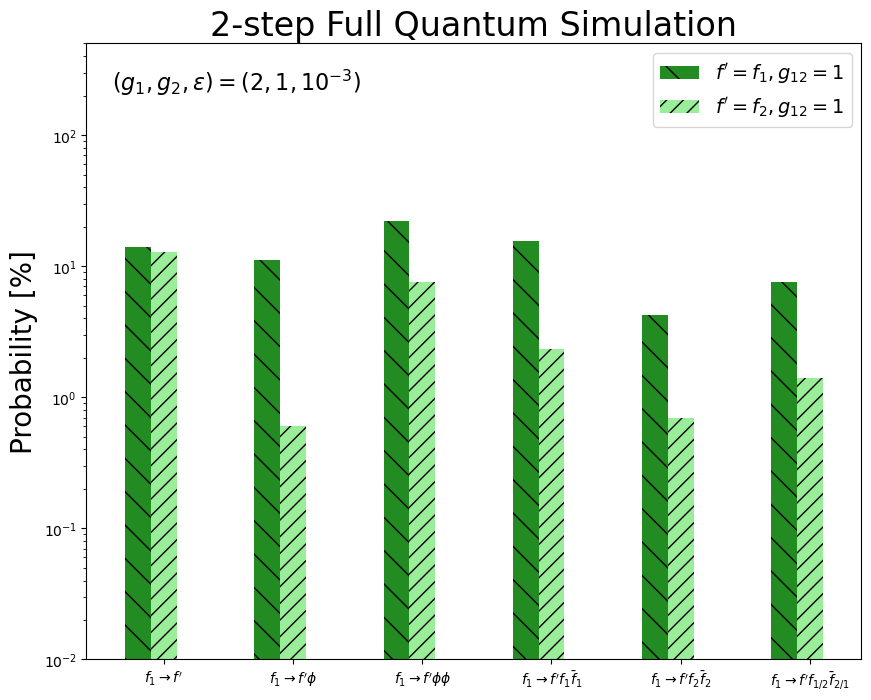

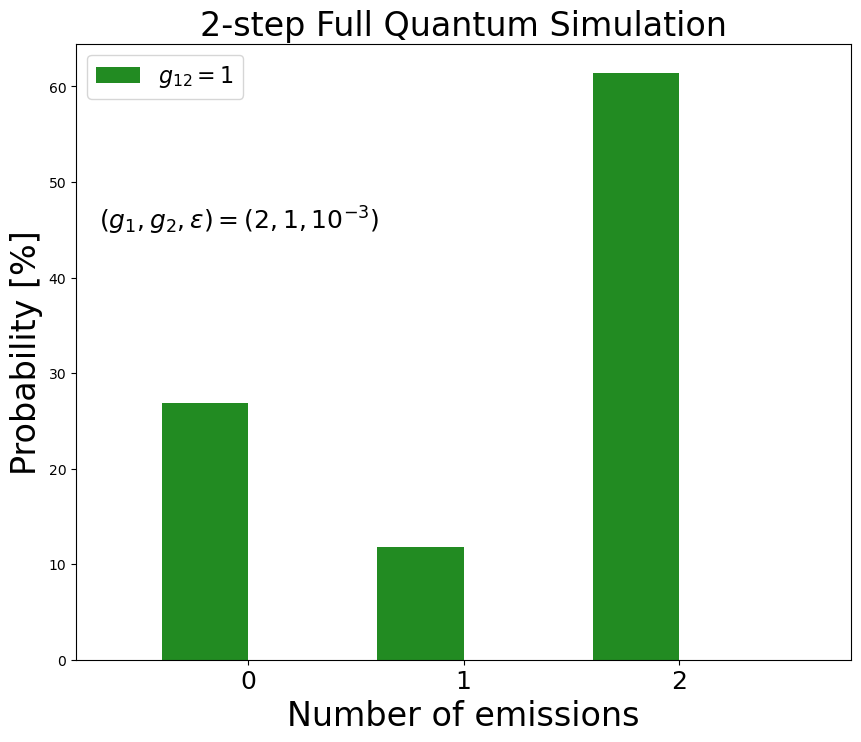

In [183]:
#for c in counts:
#    print(c, counts[c])
pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= None, save=False, wReg=False)
pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= None, save=False, wReg=False)

## Run the circuit on IBMQ_montreal

### Prepare backend

In [214]:
from qiskit.providers.ibmq import least_busy

devices= provider.backends(filters=lambda x: x.configuration().n_qubits >= 12
                                    and not x.configuration().simulator
                                    and x.status().operational==True)
print(devices)
print('\n')
print('Least busy device with >= 12 qubits: ' + str(least_busy(devices)))

[<IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibmq_brooklyn') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibm_hanoi') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibm_cairo') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibm_auckland') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>, <IBMQBackend('ibm_washington') from IBMQ(hub='ibm-q-ornl', group='lbnl', project='hep126')>]


Least busy device with >= 12 qubits: ibmq_montreal


In [215]:
shots_ibm= 1024
qc_ibm= qc

#backend_ibm= provider.get_backend('ibmq_montreal')
backend_ibm= least_busy(devices)
config_ibm= backend_ibm.configuration()
props_ibm= backend_ibm.properties()

mapped_circuit_ibm = transpile(qc_ibm, backend=backend_ibm)
qobj_ibm = assemble(mapped_circuit_ibm, backend=backend_ibm, shots=shots_ibm)

### Run

In [216]:
job_ibm = backend_ibm.run(qobj_ibm)
print(job_ibm.status())

<ipython-input-216-885652743859>:1: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job_ibm = backend_ibm.run(qobj_ibm)


JobStatus.VALIDATING


In [217]:
backend_ibm.status()

In [220]:
job_id= job_ibm.job_id()
job_status= job_ibm.status()
job_backend= job_ibm.backend()
job_queue_info= job_ibm.queue_info()

print('Job ID: ' + str(job_id))
print('Status: ' + str(job_status))
print('Backend: ' + str(job_backend))
print('Queue Info: ' + str(job_queue_info))

Job ID: 61df59e56d650894691a2232
Status: JobStatus.ERROR
Backend: ibmq_montreal
Queue Info: None


### Get results

In [221]:
job_result= job_ibm.result()
job_counts= job_result.get_counts()

IBMQJobFailureError: 'Unable to retrieve result for job 61df59e56d650894691a2232. Job has failed: Instruction bfunc is not supported. Error code: 7001.'

### Plot

0 000 001 000 001 100 0 phi f1 14
1 000 000 000 000 100 0 0 f1 136
2 100 101 100 110 100 f1 af1 f1 87
3 100 101 100 110 101 f1 af1 f2 5
4 100 101 100 111 100 f1 af2 f1 19
5 100 101 100 111 101 f1 af2 f2 6
6 100 101 101 110 100 f2 af1 f1 30
7 100 101 101 111 100 f2 af2 f1 18
8 100 101 101 111 101 f2 af2 f2 4
9 100 101 110 100 100 af1 f1 f1 83
10 100 101 110 100 101 af1 f1 f2 12
11 100 101 110 101 100 af1 f2 f1 21
12 100 101 110 101 101 af1 f2 f2 7
13 100 101 111 100 100 af2 f1 f1 21
14 100 101 111 100 101 af2 f1 f2 4
15 100 101 111 101 100 af2 f2 f1 23
16 100 101 111 101 101 af2 f2 f2 3
17 000 000 000 000 101 0 0 f2 136
18 101 100 001 000 100 phi 0 f1 94
19 101 100 001 000 101 phi 0 f2 6
20 101 101 001 001 100 phi phi f1 215
21 101 101 001 001 101 phi phi f2 80


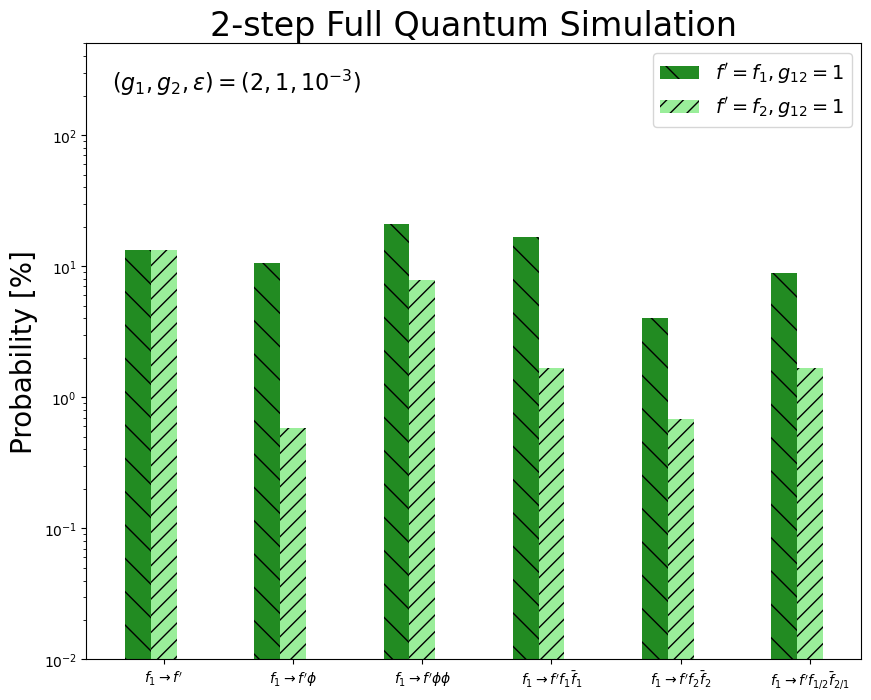

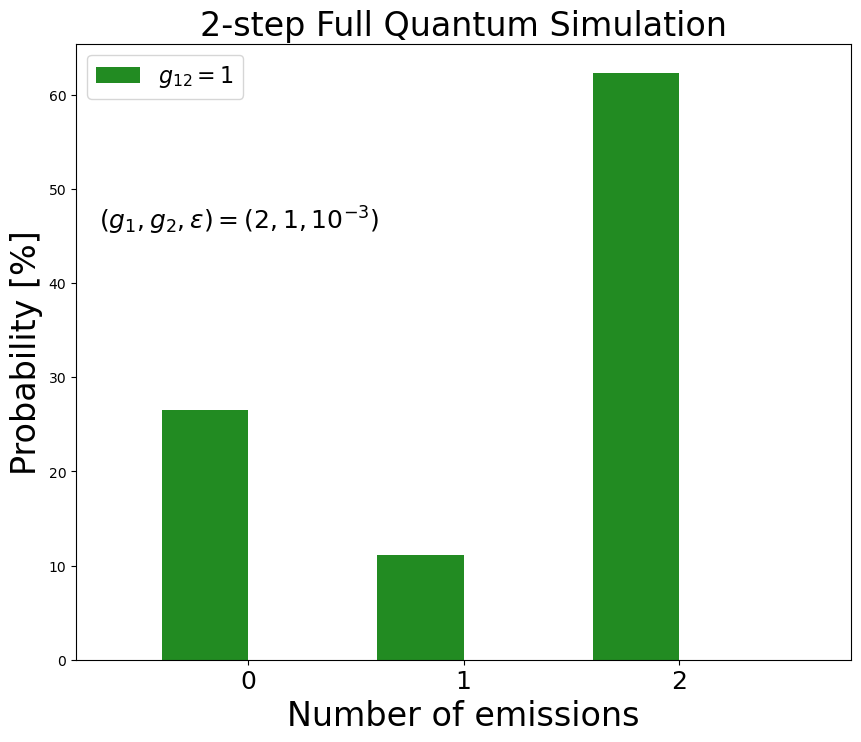

In [210]:
pl.bar_plot2(job_counts, shots_ibm, eps, g_1, g_2, counts2= None, save=False, wReg=False)
pl.bar_plot_emissions(job_counts, shots_ibm, eps, g_1, g_2, N, 1, counts2= None, save=False, wReg=False)

In [246]:
qr= QuantumRegister(4)
qc2= QuantumCircuit(qr)
from qiskit.circuit.library.standard_gates import U3Gate
qc2.append(U3Gate(1, 1, 0).control(2), [qr[0], qr[3], qr[1]])

qc2.draw()

q435_0: ──────■──────
        ┌─────┴─────┐
q435_1: ┤ U3(1,1,0) ├
        └─────┬─────┘
q435_2: ──────┼──────
              │      
q435_3: ──────■──────